# Setup


In [ ]:
### Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from datetime import datetime

from keras.datasets import cifar10

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           xlabel='Predicted label',
           ylabel='True label',
           title='Confusion matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")
    fig.tight_layout()
    plt.show()

def plot_graphs(history, best):
  
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
num_classes = 10
input_shape = (32, 32, 3)

In [ ]:
# load
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# changes labels to a binary array
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

ValueError: ignored

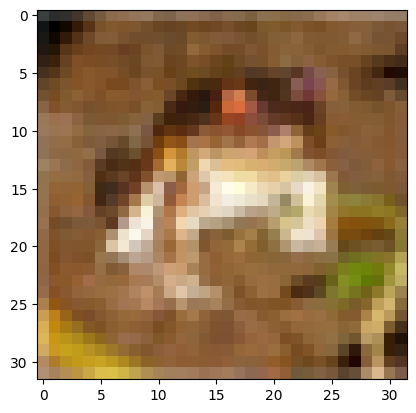

In [ ]:
plt.imshow(x_train[0]) ### forg
# print(np.dot(y_train[0],["airplane", "car", "bird", "cat", "deer", "dog", "forg", "horse", "ship", "truck"]))
# :( numpy wont let me do math with strings

# Model

In [ ]:
# Def need to change this
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation="softmax"),
        keras.layers.Dense(64, activation="softmax"),
        keras.layers.Dense(64, activation="softmax"),
        keras.layers.Dense(32, activation="softmax"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

In [ ]:
batch_size = 256
epochs = 3

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model",
    verbose = 0,
    monitor = "val_loss",
    save_best_only = True,
    mode = "auto",
)

model.compile(
    optimizer= keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )

model_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks= [checkpoint],
)

model_performance = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/3
176/176 [==============================] - ETA: 0s - loss: 2.2979 - accuracy: 0.1473

176/176 [==============================] - 76s 424ms/step - loss: 2.2979 - accuracy: 0.1473 - val_loss: 2.2900 - val_accuracy: 0.1698
Epoch 2/3
176/176 [==============================] - ETA: 0s - loss: 2.2646 - accuracy: 0.1956

176/176 [==============================] - 63s 358ms/step - loss: 2.2646 - accuracy: 0.1956 - val_loss: 2.2208 - val_accuracy: 0.1878
Epoch 3/3
176/176 [==============================] - ETA: 0s - loss: 2.1683 - accuracy: 0.1901

313/313 [==============================] - 4s 11ms/step - loss: 2.1055 - accuracy: 0.1953


# Performance

Test loss: 2.1054697036743164
Test accuracy: 0.19529999792575836


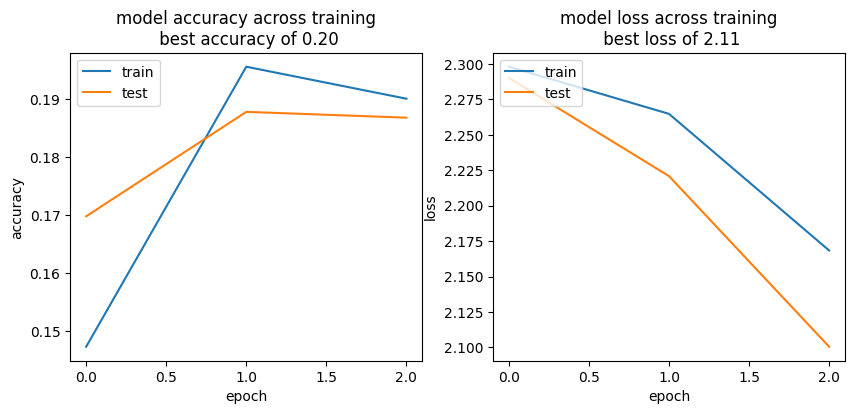

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_graphs(model_history, model_performance)

313/313 [==============================] - 4s 13ms/step


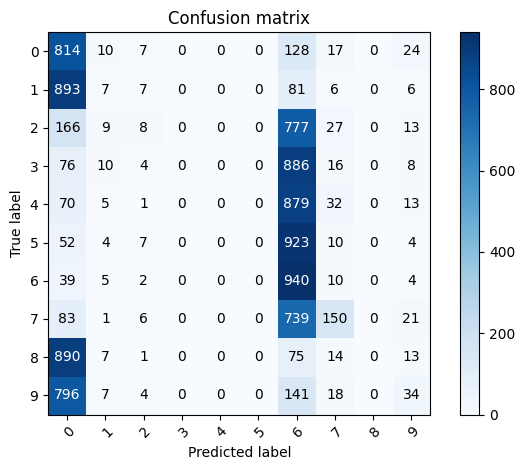

In [ ]:
y_test_class = np.argmax(y_test, axis = 1)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_max = np.zeros(y_pred.shape)
y_pred_max[np.arange(y_pred.shape[0]), y_pred_class] = 1

label_names = ["airplane", "car", "bird", "cat", "deer", "dog", "forg", "horse", "ship", "truck"]
labels = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(y_test_class, y_pred_class, labels)